## Password Strength Find Out

### Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory Data Analysis
- Data Pre-processing
- Model Turing
- Choose Best Model

## 1) Problem Statement

- This project can be use for finding out the strength of the password. If the strength is equals to one then our password will be `Strong`, otherwise it would be `Weak`

## 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/utkarshx27/passwords
  
- This dataset consists of 9 columns and 507 rows

## 2.1 Import Data and Required Packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [2]:
data = pd.read_csv('data/passwords.csv')

#### Show Top 5 Records

In [3]:
data.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


#### Shape of the dataset

In [4]:
data.shape

(507, 9)

In [5]:
print(f"Unquire Entries for Category: {data.category.unique()}")

print('='*50)

print(f"Unquire Entries for Time Unit: {data.time_unit.unique()}")


Unquire Entries for Category: ['password-related' 'simple-alphanumeric' 'animal' 'sport' 'cool-macho'
 'name' 'fluffy' 'food' 'nerdy-pop' 'rebellious-rude' nan]
Unquire Entries for Time Unit: ['years' 'minutes' 'days' 'seconds' 'months' 'weeks' 'hours' nan]


### 2.2 Dataset Information

- rank: password's rank -> (Unique Number)
- password: combination of characters -> (to access the system)
- category: password's category for assignemnt -> (password-related, simple-alphanumeric, animal, sport, cool-macho, name, fluffy, food, nerdy-pop, rebellious-rude)
- value: how much strong the password is? -> (Integer)
- time_unit: how much time will it takes to decrpt -> (years, minutes, days, seconds, months, weeks, hours)
- offline_crack_sec: how much time will it takes to crack the password in seconds -> (amount of time)
- rank_alt: alternative rank number -> (Unique Float Number)
- strength: how much strong does our password -> (Unique Number)
- font_size: font size of the password -> (size of font)

### Show the Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    float64
 7   strength           500 non-null    float64
 8   font_size          500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.8+ KB


### Check whether there are some Null Entries exists.

In [7]:
data.isnull().sum()

rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64

It seems like we have some null values, so we need to purge them all from our data.


In [8]:
data.dropna(inplace=True)

Now again check whether there are some Null values exists or not.

In [9]:
data.isnull().sum()

rank                 0
password             0
category             0
value                0
time_unit            0
offline_crack_sec    0
rank_alt             0
strength             0
font_size            0
dtype: int64

### Show the number of Duplicate values

In [10]:
data.duplicated().sum()

0

### Describe the Duplicated Values.

In [11]:
data.duplicated().describe()

count       500
unique        1
top       False
freq        500
dtype: object

If we find some of the duplicated values then we will use the following code.

In [12]:
ids = data["password"]

data[ids.isin(ids[ids.duplicated()])].sort_values("rank")

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size


### Check the data types

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               500 non-null    float64
 1   password           500 non-null    object 
 2   category           500 non-null    object 
 3   value              500 non-null    float64
 4   time_unit          500 non-null    object 
 5   offline_crack_sec  500 non-null    float64
 6   rank_alt           500 non-null    float64
 7   strength           500 non-null    float64
 8   font_size          500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 39.1+ KB


### Checking the number of unique values of each column.

In [14]:
data.nunique()

rank                 500
password             500
category              10
value                 15
time_unit              7
offline_crack_sec     16
rank_alt             500
strength              22
font_size             19
dtype: int64

### Statistics of DataSet

In [15]:
data.describe()

,rank,value,offline_crack_sec,rank_alt,strength,font_size
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000
mean,250.500000,5.602660,5.000096e-01,251.224000,7.432000,10.298000
std,144.481833,8.436005,2.658132e+00,145.052163,5.415536,3.651282
min,1.000000,1.290000,1.110000e-07,1.000000,0.000000,0.000000
25%,125.750000,3.430000,3.210000e-03,125.750000,6.000000,10.000000
50%,250.500000,3.720000,3.210000e-03,251.500000,7.000000,11.000000
75%,375.250000,3.720000,8.350000e-02,376.250000,8.000000,11.000000
max,500.000000,92.270000,2.927000e+01,502.000000,48.000000,28.000000


### 4) Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram and KDE

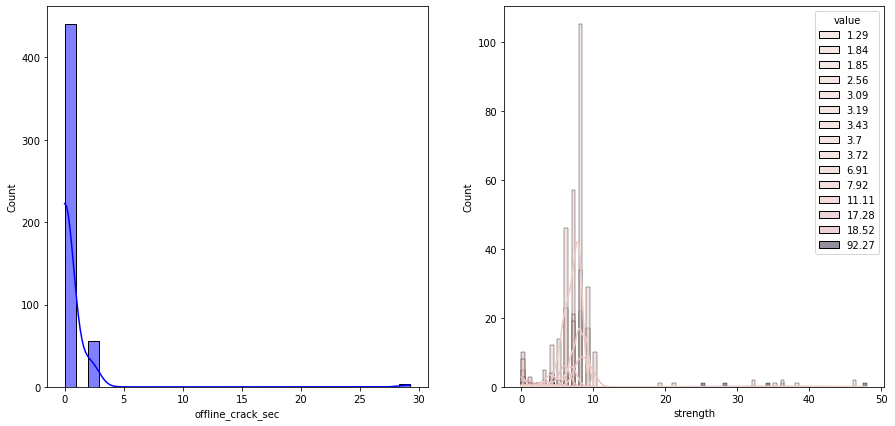

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x="offline_crack_sec",color='blue' ,bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=data, x="strength", kde=True, hue="value")
plt.show()